In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
data = pd.read_csv("UCI_Credit_Card.csv")
data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

In [ ]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

Dimensionality reduction

Dimensionality reduction is a technique used to reduce the number of features (dimensions) in a dataset while preserving as much relevant information as possible. 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 1:-1])  # Exclude ID and the target variable

# Step 2: Compute the Covariance Matrix
cov_matrix = pd.DataFrame(scaled_data).cov()

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Select Principal Components
k = 2  # Choose the number of components
top_eigenvectors = eigenvectors[:, :k]

# Step 5: Project Data onto New Feature Space
reduced_data_pca = scaled_data.dot(top_eigenvectors)

# Display the reduced data
print("Reduced Data (PCA):")
print(pd.DataFrame(reduced_data_pca, columns=["PC1", "PC2"]))


Reduced Data (PCA):
            PC1       PC2
0     -1.887962 -0.906109
1     -0.764696 -2.109288
2     -0.847408 -1.072179
3     -0.196589 -0.809022
4     -0.840934 -0.072538
...         ...       ...
29995  2.523445  0.692641
29996 -1.775043 -0.051203
29997  0.357457 -3.312755
29998  0.650552  0.722901
29999 -0.145564 -0.809751

[30000 rows x 2 columns]


In [ ]:
from sklearn.decomposition import PCA, KernelPCA, NMF
import numpy as np
import pandas as pd

def pca(X=np.array([]), no_dims=2):
    print("Preprocessing the data using PCA...")
    
    # Assuming X is the dataset you provided
    (n, d) = X.shape
    
    # Step 1: Subtract the mean from each feature
    Mean = np.tile(np.mean(X, 0), (n, 1))
    X = X - Mean
    
    # Step 2: Compute the covariance matrix
    cov_matrix = np.dot(X.T, X)
    
    # Step 3: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Step 4: Select the top 'no_dims' eigenvectors
    top_eigenvectors = eigenvectors[:, :no_dims]
    
    # Step 5: Project the data onto the new feature space
    Y = np.dot(X, top_eigenvectors)
    
    return Y

# Assuming 'data' is your dataset
data = pd.read_csv("UCI_Credit_Card.csv")
# Extract numeric columns (excluding ID and target variable)
numeric_data = data.iloc[:, 1:-1].to_numpy()

# Perform PCA
reduced_data_pca = pca(X=numeric_data, no_dims=2)

# Display the reduced data
print("Reduced Data (PCA):")
print(pd.DataFrame(reduced_data_pca, columns=["PC1", "PC2"]))


Preprocessing the data using PCA...
Reduced Data (PCA):
                 PC1           PC2
0     -166488.191086  75538.153664
1     -114226.976816  -9780.671251
2      -98432.362180  33471.387331
3      -71230.675903  95224.273104
4     -114834.618365  68729.185233
...              ...           ...
29995  200018.431424  55465.636023
29996  -97718.568024 -35089.032854
29997 -140206.128048  77857.496540
29998  -41427.740774  74908.303672
29999  -70860.311209  95514.144309

[30000 rows x 2 columns]


Ploting the first two principal components.

C:\Users\anwes\AppData\Local\Temp\ipykernel_1844\1232533282.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable


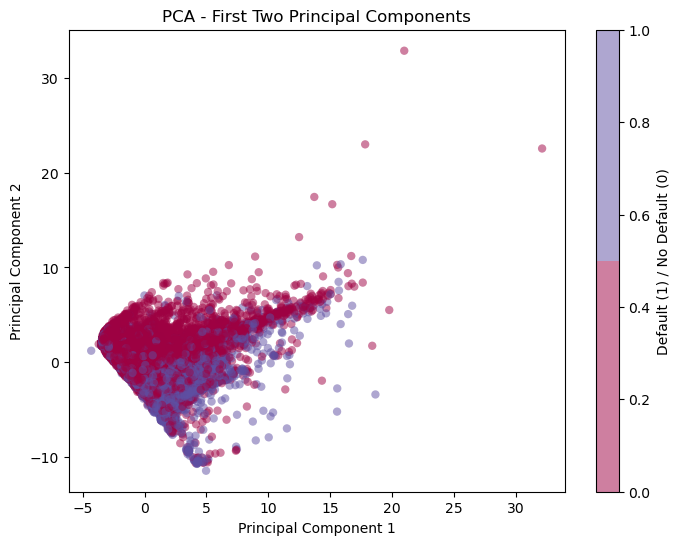

In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset
data = pd.read_csv("UCI_Credit_Card.csv")

# Extract numeric columns (excluding ID and target variable)
numeric_data = data.iloc[:, 1:-1].to_numpy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(scaled_data)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1],
            c=data['default.payment.next.month'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable

plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Default (1) / No Default (0)')

plt.show()


Plot the dataset.

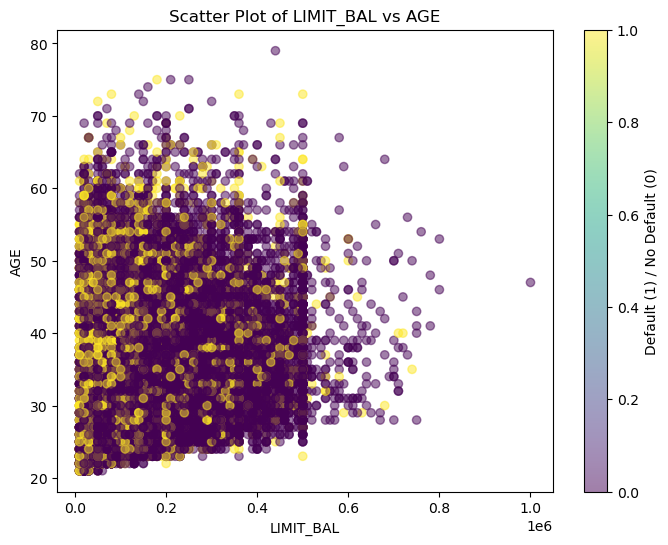

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Scatter plot of the first two features
plt.figure(figsize=(8, 6))
plt.scatter(data['LIMIT_BAL'], data['AGE'], c=data['default.payment.next.month'], cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of LIMIT_BAL vs AGE')
plt.xlabel('LIMIT_BAL')
plt.ylabel('AGE')
plt.colorbar(label='Default (1) / No Default (0)')

plt.show()


Principal Component Analysis (PCA):
It works on the condition that while the data in a higher dimensional space is mapped to data in a lower dimension space, the variance of the data in the lower dimensional space should be maximum.

C:\Users\anwes\AppData\Local\Temp\ipykernel_1844\1298913204.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable


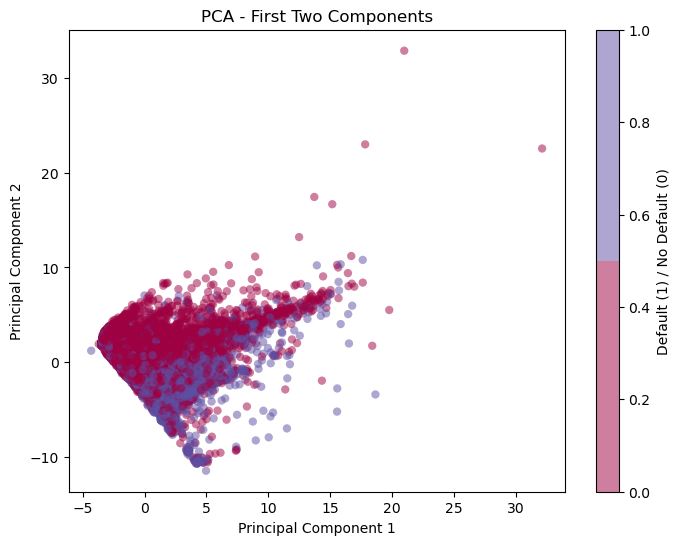

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Extract numeric columns (excluding ID and target variable)
numeric_data = data.iloc[:, 1:-1].to_numpy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA with 2 components (you can adjust the number of components)
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(scaled_data)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1],
            c=data['default.payment.next.month'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable

plt.title('PCA - First Two Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Default (1) / No Default (0)')

plt.show()


Linear Discriminant Analysis (LDA):
Linear Discriminant Analysis (LDA) is a dimensionality reduction and classification technique that aims to find the linear combinations of features that best separate two or more classes. It's commonly used in the context of classification problems where the goal is to discriminate between multiple classes based on a set of features.

C:\Users\anwes\AppData\Local\Temp\ipykernel_31516\2606437981.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable


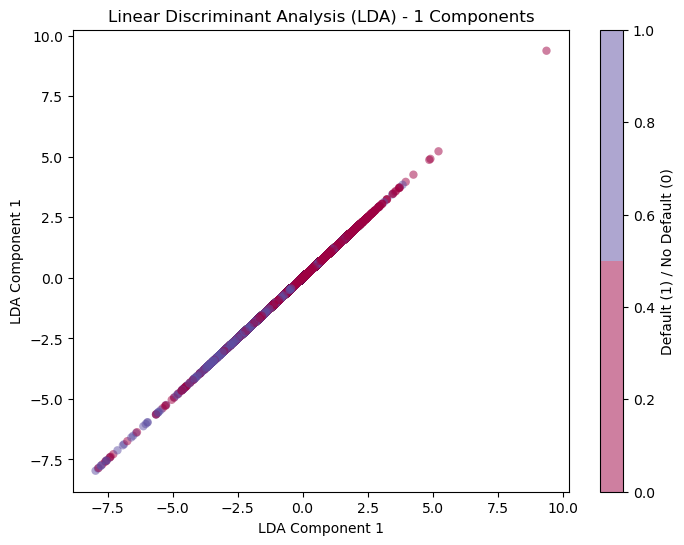

In [6]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your own dataset
data = pd.read_csv("UCI_Credit_Card.csv")

# Extract numeric columns (excluding ID and target variable)
numeric_data = data.iloc[:, 1:-1].to_numpy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Number of unique classes minus one
num_classes_minus_one = len(set(data['default.payment.next.month'])) - 1

# Calculate the number of components based on the minimum between the number of features and classes minus one
num_components = min(scaled_data.shape[1], num_classes_minus_one)

if num_components > 0:
    # Apply LDA with the calculated number of components
    lda = LinearDiscriminantAnalysis(n_components=num_components)
    reduced_data_lda = lda.fit_transform(scaled_data, data['default.payment.next.month'])

    # Plot the LDA components
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data_lda[:, 0], reduced_data_lda[:, 0],  # Use the same component for both x and y for simplicity
                c=data['default.payment.next.month'], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable

    plt.title(f'Linear Discriminant Analysis (LDA) - {num_components} Components')
    plt.xlabel(f'LDA Component 1')
    plt.ylabel(f'LDA Component 1')
    plt.colorbar(label='Default (1) / No Default (0)')

    plt.show()
else:
    print("Number of components is not feasible for the given data.")


Generalized Discriminant Analysis (GDA):
GDA is a more general form of discriminant analysis that relaxes some of the assumptions of LDA.
Useful when the assumptions of LDA, such as equal covariance matrices for all classes, are not met.


C:\Users\anwes\AppData\Local\Temp\ipykernel_1844\1515935722.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable


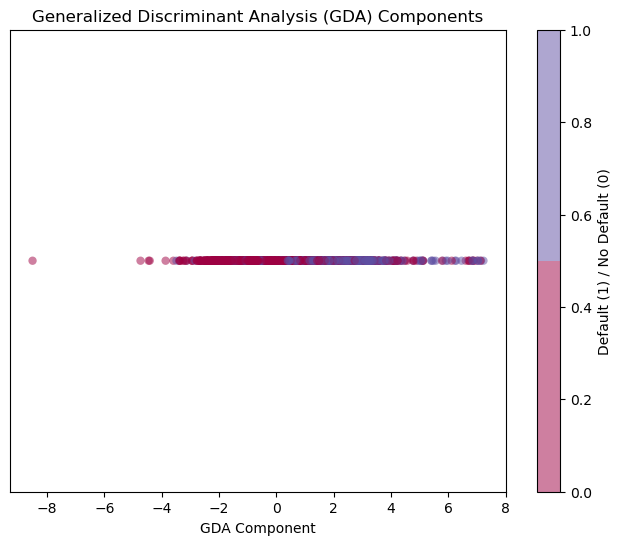

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your own dataset
data = pd.read_csv("UCI_Credit_Card.csv")

# Extract numeric columns (excluding ID and target variable)
numeric_data = data.iloc[:, 1:-1].to_numpy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Separate data based on the target variable
class_0 = scaled_data[data['default.payment.next.month'] == 0]
class_1 = scaled_data[data['default.payment.next.month'] == 1]

# Calculate the class means and covariances
mean_class_0 = np.mean(class_0, axis=0)
mean_class_1 = np.mean(class_1, axis=0)
cov_class_0 = np.cov(class_0, rowvar=False)
cov_class_1 = np.cov(class_1, rowvar=False)

# Combine class means and covariances
overall_mean = np.mean(scaled_data, axis=0)
pooled_cov = (len(class_0) * cov_class_0 + len(class_1) * cov_class_1) / (len(class_0) + len(class_1))

# Calculate the inverse of the pooled covariance matrix
inv_pooled_cov = np.linalg.inv(pooled_cov)

# Calculate the discriminant coefficients
w = np.dot(inv_pooled_cov, (mean_class_1 - mean_class_0))

# Project the data onto the discriminant axis
reduced_data_gda = np.dot(scaled_data, w)

# Plot the GDA components
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_gda, np.zeros_like(reduced_data_gda),
            c=data['default.payment.next.month'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable

plt.title('Generalized Discriminant Analysis (GDA) Components')
plt.xlabel('GDA Component')
plt.yticks([])  # No y-axis ticks
plt.colorbar(label='Default (1) / No Default (0)')

plt.show()


Quadratic Discriminant Analysis (QDA):
It is a classification and dimensionality reduction technique that extends the Linear Discriminant Analysis (LDA) method. While LDA assumes that the covariance matrix is the same for all classes, QDA allows for different covariance matrices for each class. In other words, QDA relaxes the homogeneity of covariance assumption made by LDA.

C:\Users\anwes\AppData\Local\Temp\ipykernel_31516\1543800474.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable


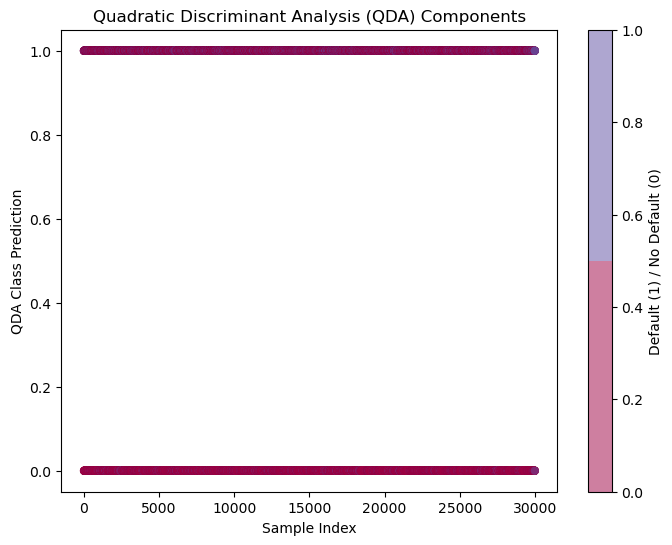

In [10]:
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your own dataset
data = pd.read_csv("UCI_Credit_Card.csv")

# Extract numeric columns (excluding ID and target variable)
numeric_data = data.iloc[:, 1:-1].to_numpy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply QDA
qda = QuadraticDiscriminantAnalysis()
reduced_data_qda = qda.fit(scaled_data, data['default.payment.next.month']).predict(scaled_data)

# Plot the QDA components
plt.figure(figsize=(8, 6))
plt.scatter(range(len(reduced_data_qda)), reduced_data_qda,
            c=data['default.payment.next.month'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable

plt.title('Quadratic Discriminant Analysis (QDA) Components')
plt.xlabel('Sample Index')
plt.ylabel('QDA Class Prediction')
plt.colorbar(label='Default (1) / No Default (0)')

plt.show()


Kernel PCA (KPCA): 
A kernel trick is simply a method to project non-linear data onto a higher dimensional space and separate different distributions of data. Once the distributions are separated we can use PCA to separate them linearly.

In [ ]:

from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Extract numeric columns (excluding ID and target variable)
numeric_data = data.iloc[:, 1:-1].to_numpy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform KPCA
kpca = KernelPCA(n_components=2, kernel='rbf')  # You can choose different kernels
reduced_data_kpca = kpca.fit_transform(scaled_data)

# Plot the first two kernel principal components
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_kpca[:, 0], reduced_data_kpca[:, 1],
            c=data['default.payment.next.month'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable

plt.title('Kernel PCA - First Two Components')
plt.xlabel('Kernel Principal Component 1')
plt.ylabel('Kernel Principal Component 2')
plt.colorbar(label='Default (1) / No Default (0)')

plt.show()


Define kernel PCA and see how it separates this feature space.

In [19]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Extract numeric columns (excluding ID and target variable)
numeric_data = data.iloc[:, 1:-1].to_numpy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Define Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)  # Adjust the gamma parameter

# Fit and transform the data
reduced_data_kpca = kpca.fit_transform(scaled_data)

# Plot the first two kernel principal components
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_kpca[:, 0], reduced_data_kpca[:, 1],
            c=data['default.payment.next.month'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))  # 2 colors for binary target variable

plt.title('Kernel PCA - First Two Components')
plt.xlabel('Kernel Principal Component 1')
plt.ylabel('Kernel Principal Component 2')
plt.colorbar(label='Default (1) / No Default (0)')

plt.show()


Singular Value Decomposition (SVD):
The singular value decomposition or SVD is a factorization method of a real or complex matrix. It is efficient when working with a sparse dataset; a dataset having a lot of zero entries.

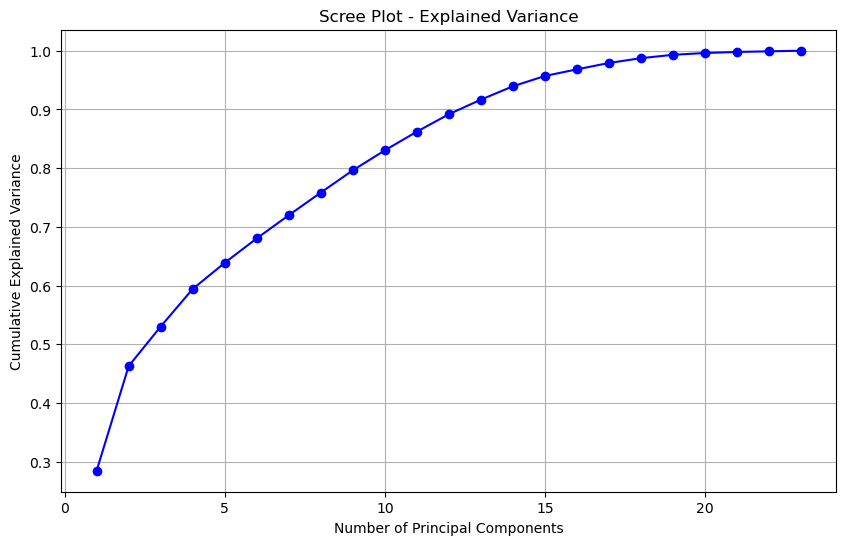

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your own dataset
data = pd.read_csv("UCI_Credit_Card.csv")

# Extract numeric columns (excluding ID and target variable)
numeric_data = data.iloc[:, 1:-1].to_numpy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform SVD
U, Sigma, VT = np.linalg.svd(scaled_data, full_matrices=False)

# Create a Scree plot to visualize explained variance
explained_variance = (Sigma ** 2) / (len(scaled_data) - 1)
cumulative_variance = np.cumsum(explained_variance) / np.sum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot - Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
